<a href="https://colab.research.google.com/github/mariuszkx5/ML-Projects/blob/master/searching_for_best_parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Klikasz podłącz dysk google. Znajdziesz to po lewej stronie w zakładce pliki. 

In [ ]:
!pip install scikit-optimize

In [ ]:
import pandas as pd

In [ ]:
sheet_id = '1iIB9sRjtq7oVfZ0iqB8fn8ebD1A1wpr12QDmW0a-lG0'
sheet_name = 'Dane_Waldka'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df

,objective,param0,param1,param2,param3,param4,param5
0,1699,0,3,0,39,14,4
1,1116,1,9,6,-31,4,2
2,4023,-1,3,0,63,8,2
3,2542,0,-9,6,48,-9,3
4,1799,0,10,7,40,2,3
5,2809,0,3,0,-50,18,2
6,1384,0,9,6,35,3,3
7,999,0,9,6,-24,17,3
8,1840,0,3,0,42,5,2
9,5659,1,3,0,74,11,2


In [ ]:
# Przestrzeń (siatka punktów) jest już czymś co trzeba dopasować pod dany parametr 
search_space = [(df[column].min()-10, df[column].max()+10)for column in df.columns[1:]]

In [ ]:
from skopt import gp_minimize
import numpy as np

In [ ]:
def f(x):
    """Dumb Function"""
    return 0

In [ ]:
res = gp_minimize(f,                  # the function to minimize
                  search_space,      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=1,         # the number of evaluations of f
                  n_random_starts=0,  # the number of random initialization points
                  noise=0.1,       # the noise level (optional)
                  x0=df[df.columns[1:]].values.tolist(),
                  y0=df['objective'].values.tolist())   # the random seed

In [ ]:
res.func_vals = res.func_vals[:-1]
res.x_iters = res.x_iters[:-1]

In [ ]:
output_dict = {key:value for key, value in zip(df.columns[1:], res.x)}

In [ ]:
print(f'Model proposes to search this input points:\n{output_dict}')

Model proposes to search this input points:
{'param0': -1, 'param1': 7, 'param2': 8, 'param3': -25, 'param4': -9, 'param5': 2}


In [ ]:
from skopt.plots import plot_objective, plot_convergence

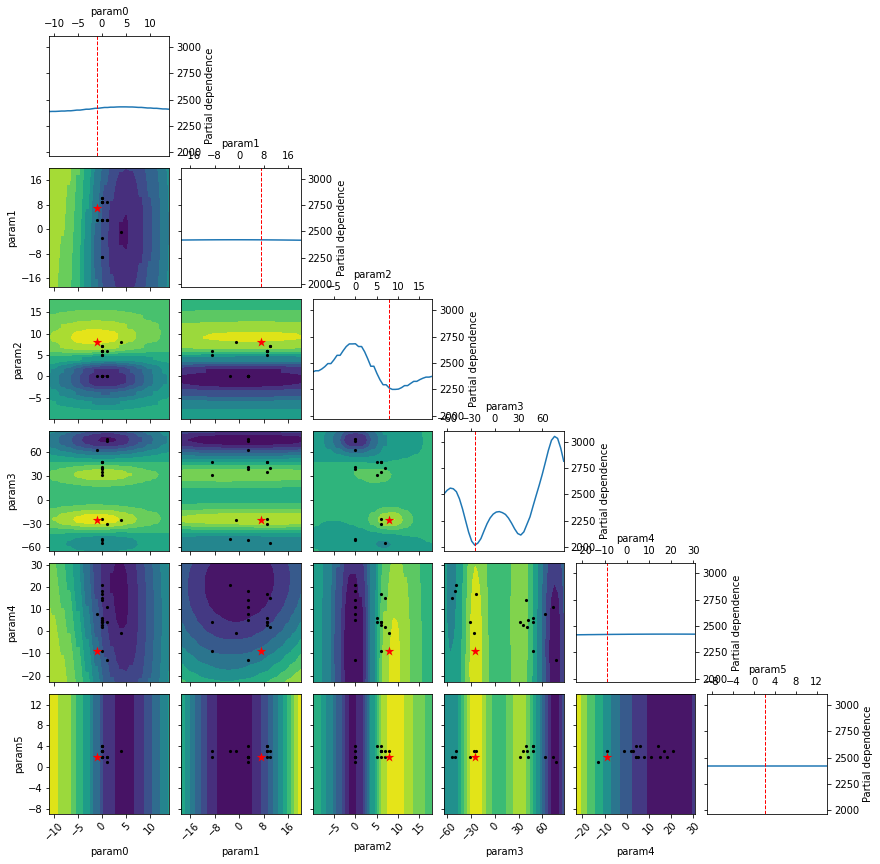

In [ ]:
_ = plot_objective(res, dimensions=df.columns[1:])

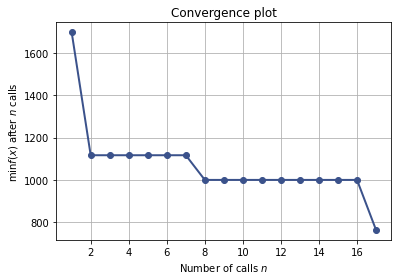

In [ ]:
_ = plot_convergence(res)